In [1]:
import pandas as pd
import os
BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList = sorted(Bus_FileName_DirList)
data_1_1 = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[9]))

In [4]:
# 获得每个公交线路的客流量
bus_ser = []
bus_ser_num = []

bus_data = data_1_1.loc[(data_1_1['Direction'] == 1.0)]
N = len(bus_data.Bus_Service_Number.unique())
n = 0
for Bus_Service_Number in bus_data.Bus_Service_Number.unique():
    bus_ser.append(Bus_Service_Number)
    num = bus_data.loc[(bus_data['Bus_Service_Number']
                        == Bus_Service_Number)].shape[0]
    bus_ser_num.append(num)
    n = n+1
    print("{}/{}".format(n, N))

1/463
2/463
3/463
4/463
5/463
6/463
7/463
8/463
9/463
10/463
11/463
12/463
13/463
14/463
15/463
16/463
17/463
18/463
19/463
20/463
21/463
22/463
23/463
24/463
25/463
26/463
27/463
28/463
29/463
30/463
31/463
32/463
33/463
34/463
35/463
36/463
37/463
38/463
39/463
40/463
41/463
42/463
43/463
44/463
45/463
46/463
47/463
48/463
49/463
50/463
51/463
52/463
53/463
54/463
55/463
56/463
57/463
58/463
59/463
60/463
61/463
62/463
63/463
64/463
65/463
66/463
67/463
68/463
69/463
70/463
71/463
72/463
73/463
74/463
75/463
76/463
77/463
78/463
79/463
80/463
81/463
82/463
83/463
84/463
85/463
86/463
87/463
88/463
89/463
90/463
91/463
92/463
93/463
94/463
95/463
96/463
97/463
98/463
99/463
100/463
101/463
102/463
103/463
104/463
105/463
106/463
107/463
108/463
109/463
110/463
111/463
112/463
113/463
114/463
115/463
116/463
117/463
118/463
119/463
120/463
121/463
122/463
123/463
124/463
125/463
126/463
127/463
128/463
129/463
130/463
131/463
132/463
133/463
134/463
135/463
136/463
137/463
138/463
139/

In [5]:
max_value = max(bus_ser_num)

# 找到最大值的索引
index_of_max = bus_ser_num.index(max_value)

print("最大值:", max_value)
print("最大值的索引:", index_of_max)

最大值: 29515
最大值的索引: 31


In [6]:
bus_data = data_1_1.copy()
bus_data['a'] = ' '
bus_data.Ride_start_time = pd.to_datetime(
    bus_data.Ride_start_date+bus_data.a+bus_data.Ride_start_time)
bus_data.Ride_end_time = pd.to_datetime(
    bus_data.Ride_end_date+bus_data.a+bus_data.Ride_end_time)

In [7]:
bus_service = '913'  # 最大客流的线路
data = data_1_1[(data_1_1.Bus_Service_Number == bus_service)]
data = data.sort_values(by="Ride_start_time")

In [8]:
data

,Card_Number,Card_Type,Travel_Mode,Bus_Service_Number,Direction,Bus_Trip_Num,Bus_Reg_Num,Boarding_stop_stn,Alighting_stop_stn,Ride_start_date,Ride_start_time,Ride_end_date,Ride_end_time
4161736,2671952,Adult,Bus,913,1.0,16.0,3085.0,46799,46769,2017-01-10,00:00:49,2017-01-10,00:04:04
4150921,2566630,Adult,Bus,913,1.0,16.0,3085.0,46799,46779,2017-01-10,00:00:50,2017-01-10,00:02:49
4138212,4687489,Adult,Bus,913,1.0,16.0,3085.0,46799,46769,2017-01-10,00:00:51,2017-01-10,00:04:03
4157405,5619834,Student,Bus,913,1.0,16.0,3085.0,46799,46769,2017-01-10,00:00:52,2017-01-10,00:04:00
4159785,3018101,Adult,Bus,913,1.0,16.0,3085.0,46799,46069,2017-01-10,00:00:53,2017-01-10,00:18:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159823,3123536,Adult,Bus,913,1.0,16.0,1441.0,46771,46831,2017-01-10,23:58:24,2017-01-11,00:04:56
4177745,5589274,Adult,Bus,913,1.0,17.0,982.0,46009,46831,2017-01-10,23:58:30,2017-01-11,00:11:10
4160559,4947331,Adult,Bus,913,1.0,17.0,982.0,46009,46831,2017-01-10,23:58:31,2017-01-11,00:11:08
4163414,3171284,Adult,Bus,913,1.0,16.0,1441.0,46781,46841,2017-01-10,23:59:29,2017-01-11,00:06:47


In [9]:
data_temp = data[['Bus_Trip_Num', 'Bus_Reg_Num',
                  'Boarding_stop_stn', 'Ride_start_time']]

In [11]:
import warnings
warnings.filterwarnings("ignore")
result_list = []
# for trip_temp in data_temp.Bus_Trip_Num.unique():
data_trip = data_temp.loc[data_temp['Bus_Trip_Num'] == 1.0]
for reg_temp in data_trip.Bus_Reg_Num.unique():
    data_reg = data_trip.loc[data_trip['Bus_Reg_Num'] == reg_temp]
    # print(data_reg)

    data_reg['Ride_start_time'] = pd.to_datetime(data_reg['Ride_start_time'])
    # print(data_reg)
    # 按 'Boarding_stop_stn' 进行分组，计算每组中最后一个搭乘时间和第一个搭乘时间的差值
    result = data_reg.groupby('Boarding_stop_stn')[
        'Ride_start_time'].agg(['first', 'last']).reset_index()
    result['time_difference'] = (
        result['last'] - result['first']).dt.total_seconds()
    # 剔除差值为零的行
    result = result.loc[result['time_difference'] != 0]
    result_list = result_list + result.time_difference.tolist()

In [12]:
filtered_list = [x for x in result_list if x <= 60]

In [13]:
len(filtered_list)

171

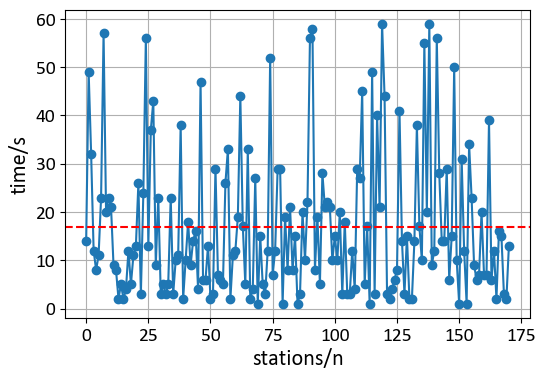

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Calibri'
fig = plt.figure(figsize=(6, 4))

plt.plot(filtered_list, marker='o')
# plt.title('站点停留时间统计',fontsize=16)
# plt.xticks(result_df.index[::4])
average_value = sum(filtered_list) / len(filtered_list)
plt.axhline(y=average_value, color='r', linestyle='--', label='Average')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('stations/n', fontsize=16)
plt.ylabel('time/s', fontsize=16)
plt.grid(True)
plt.show()
fig.savefig('./站点停留_new.svg', bbox_inches='tight')